<a href="https://colab.research.google.com/github/DionKimmm/2019_Summer_DL_Prof_Seok/blob/master/190722_Ver4_Conv_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 새로운 개념 : Max Pooling과 대조되는 Unsample

# Convolution Autoencoder

## 필요한 라이브러리 불러오기

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

## 데이터 불러오기 & 하이퍼파라미터 정의

In [2]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

learning_rate = 0.001 
# learning_rate = 0.01
training_epoch = 20
batch_size = 100

# 신경망 레이어 구성 옵션
n_hidden = 256 # 히든 레이어의 뉴런 갯수
n_input = 28*28 # 입력값 크기 - 이미지 픽셀수

W0722 06:43:33.634828 140220493727616 deprecation.py:323] From <ipython-input-2-8ca3dbbdf1cc>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0722 06:43:33.637667 140220493727616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0722 06:43:33.640567 140220493727616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0722 06:43:33.935145 140220493727616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0722 06:43:33.938364 140220493727616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0722 06:43:33.996205 140220493727616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## 오토인코더 신경망 모델 구성

In [3]:

# X = tf.placeholder(tf.float32, [None, n_input])


# L1_encoder = tf.layers.dense(inputs=X, units=512, activation=tf.nn.relu) 
# L2_encoder = tf.layers.dense(inputs=L1_encoder, units=256, activation=tf.nn.relu)
# L3_encoder = tf.layers.dense(inputs=L2_encoder, units=128, activation=tf.nn.relu)

# Latent     = tf.layers.dense(inputs=L3_encoder, units=64, activation=tf.nn.relu) 

# L3_decoder = tf.layers.dense(inputs=Latent, units=128, activation=tf.nn.relu) 
# L2_decoder = tf.layers.dense(inputs=L3_decoder, units=256, activation=tf.nn.relu)
# L1_decoder = tf.layers.dense(inputs=L2_decoder, units=512, activation=tf.nn.relu)

# Output = tf.layers.dense(inputs=L1_decoder, units=n_input, activation=tf.nn.sigmoid)

#######################

# 이때까지는 1차원으로 쭉 펼친 784로
# 지금은 사진 하나하나가 필요하기 때문에 28*28로 저장해야함

inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
# padding='same'를 하면 7*7 에서 풀링을 진행할 때 패딩을 주어 4*4로 받게 된다.
conv1 = tf.layers.conv2d(inputs=inputs_, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=(2,2), strides=(2,2), padding='same')

conv2 = tf.layers.conv2d(inputs=maxpool1, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2), padding='same')

conv3 = tf.layers.conv2d(inputs=maxpool2, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
encoded = tf.layers.max_pooling2d(conv3, pool_size=(2,2), strides=(2,2), padding='same')

###Decoder
# 새로운 개념 : Max Pooling과 대조되는 Unsample
# 없는걸 만드니까 어렵겠지? tf에서는 부드럽게 처리해주는 리사이징 메소드가 주어진다구.

upsample1 = tf.image.resize_images(encoded, size=(7,7), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
conv4 = tf.layers.conv2d(inputs=upsample1, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)

upsample2 = tf.image.resize_images(conv4, size=(14,14), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
conv5 = tf.layers.conv2d(inputs=upsample2, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)

upsample3 = tf.image.resize_images(conv5, size=(28,28), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
conv6 = tf.layers.conv2d(inputs=upsample3, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)

logits = tf.layers.conv2d(inputs=conv6, filters=1, kernel_size=(3,3), padding='same', activation=None)

decoded = tf.nn.sigmoid(logits)
# decoded = logits

W0722 06:43:34.271603 140220493727616 deprecation.py:323] From <ipython-input-3-f7f95cc34c1d>:7: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0722 06:43:34.278311 140220493727616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0722 06:43:34.523760 140220493727616 deprecation.py:323] From <ipython-input-3-f7f95cc34c1d>:8: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


## 손실함수 정의 및 최적화 

In [4]:
# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 # 위해 입력 값인 X 값을 평가를 # 위한 실측 결과 값으로하여 decoder 와의 차이 # 를 손실값으로 설정

# cost = tf.reduce_mean(tf.pow(X - Output, 2))
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits) 
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


W0722 06:43:34.829310 140220493727616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 훈련 데이터를 오토인코더 신경망 모델 학습

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
total_batch = int(mnist.train.num_examples/batch_size)

# for epoch in range(training_epoch):
#       total_cost = 0
#       for i in range(total_batch):
#         batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#         _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
#         total_cost += cost_val
#       print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

# print('최적화 완료!')

# 기법 추가 : np.random.randn()로 잡음을 생성. 원래 이미지로 잡음을 만들더라도 깨끗하게 나온단다
noise_factor = 0.5

for e in range(training_epoch):    
  print(e)    
  for ii in range(mnist.train.num_examples // batch_size):       
    batch = mnist.train.next_batch(batch_size)      
    # Get images from the batch       
    imgs = batch[0].reshape((-1, 28, 28, 1))
    # Add random noise to the input images       
    noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)       
    # Clip the images to be between 0 and 1      
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
    # Noisy images as inputs, original images as targets       
    batch_cost, _ = sess.run([cost, optimizer], feed_dict={inputs_: noisy_imgs, targets_: imgs}) 
  print("Epoch: {}/{}...".format(e + 1, training_epoch), "Training loss: {:.4f}".format(batch_cost))
      
sample_size = 10 
tmp = mnist.test.images[:sample_size] 
images = tmp.reshape((-1, 28, 28, 1)) 
result = sess.run(decoded, feed_dict={inputs_: images})

0
Epoch: 1/20... Training loss: 0.1434
1
Epoch: 2/20... Training loss: 0.1352
2
Epoch: 3/20... Training loss: 0.1265
3
Epoch: 4/20... Training loss: 0.1233
4
Epoch: 5/20... Training loss: 0.1235
5
Epoch: 6/20... Training loss: 0.1166
6
Epoch: 7/20... Training loss: 0.1152
7
Epoch: 8/20... Training loss: 0.1080
8
Epoch: 9/20... Training loss: 0.1075
9
Epoch: 10/20... Training loss: 0.1062
10
Epoch: 11/20... Training loss: 0.1046
11
Epoch: 12/20... Training loss: 0.1079
12
Epoch: 13/20... Training loss: 0.1085
13
Epoch: 14/20... Training loss: 0.1053
14
Epoch: 15/20... Training loss: 0.0973
15
Epoch: 16/20... Training loss: 0.1067
16
Epoch: 17/20... Training loss: 0.1030
17
Epoch: 18/20... Training loss: 0.1051
18
Epoch: 19/20... Training loss: 0.1047
19
Epoch: 20/20... Training loss: 0.1060


## 합성 결과 확인

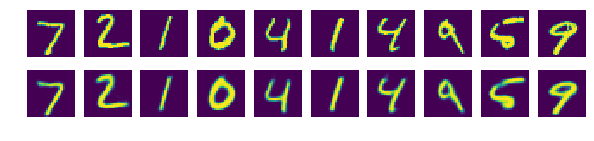

In [7]:

# # 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교
# sample_size = 10
# samples = sess.run(, feed_dict={X: mnist.test.images[:sample_size]})
# fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

# for i in range(sample_size):
#      ax[0][i].set_axis_off()
#      ax[1][i].set_axis_off()
#      ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
#      ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

# plt.show()

sample_size = 10 
tmp = mnist.test.images[:sample_size] 
images = tmp.reshape((-1, 28, 28, 1)) 
result = sess.run(decoded, feed_dict={inputs_: images})
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):    
  ax[0][i].set_axis_off()    
  ax[1][i].set_axis_off()    
  ax[0][i].imshow(np.reshape(images[i], [28,28]))   
  ax[1][i].imshow(np.reshape(result[i], [28,28]))

plt.show()

In [0]:
!nvidia-smi